# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott)

# Lecture 6: Quadrature

## Learning objectives:

* Be able to describe relationship between integration and quadrature.

## Performing numerical integration

*Quadrature* is the term used for numerical evaluation of a definite integral, or put more simply, finding the area under a curve. If we have a function $f(x)$ defined between $a$ and $b$, the
[integral](http://en.wikipedia.org/wiki/Integral) is defined as 

\begin{equation}
F\left ( x \right ) = \int_{a}^{b} f\left ( x \right )dx
\end{equation}

and its result is the area under the curve. This operation is an essential part of calculus, being the inverse of differentiation. Knowing the value of the area under a curve is important to all kinds of applications. However, many expressions are difficult to integrate analytically, or the function which governs their shape is unknown, and we only have data. Therefore, no course on numerical methods is complete without discussing the different methods of numerical integration. A fundamental property of a definite integral is that

\begin{equation}
\int_{a}^{b} f\left ( x \right )dx = \int_{c}^{a} f\left ( x \right )dx + \int_{b}^{c} f\left ( x \right )dx
\end{equation}

where $c$ is a point between $a$ and $b$. Therefore, we can perform an integration by splitting the function up into sections and summing the result of each integration. If the function is complicated or unknown, we can approximate its distribution between subdivisions and choose the size of subdivisions to get an accurate result. This is known as *adaptive quadrature*. In this lecture, five different quadrature methods will be covered in the context of a simple function:

* Midpoint rule
* Trapezoid rule
* Simpson's rule
* Composite Simpson's rule
* Weddle's rule.

## Integration example
Let's begin with a simple function to demonstrate the different methods of numerical integration:

\begin{equation}
f\left ( x \right ) = \sin \left ( x \right ).
\end{equation}

We want to know what the area under the sin function is between 0 and $pi$. The integral of $\sin \left ( x \right )$ is $-\cos \left ( x \right )$, so we can integrate it ourselves by hand to find the true area under the curve:

\begin{equation}
F\left ( x \right ) =  \int_{0}^{\pi} \sin \left ( x \right ) = \left [ -\cos\left ( x \right )+ C \right ]_{0}^{\pi} =-\cos\left ( \pi \right ) + \cos\left ( 0 \right ) = 2
\end{equation}

Let's start by plotting the function between these points.

Populating the interactive namespace from numpy and matplotlib


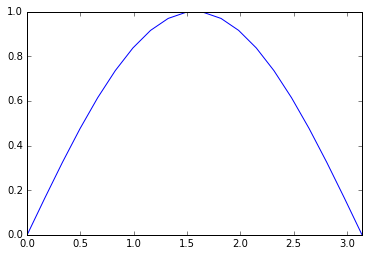

In [12]:
%pylab inline

x = linspace(0,np.pi,20) #Get the value of pi from numpy
y = sin(x)

plot(x, y)
xlim([0,np.pi]) #Set x axis limits between 0 and pi
show()

Now let's investigate the different quadrature rules, finding the area under the curve and seeing how it differs from the true area which we know is 2.

### Rule 1: Midpoint rule

The midpoint rule is the simplest quadrature rule. Let $h = b - a$ be the length of the interval. The midpoint rule, $M$, approximates the integral by the area of a rectangle, with base of length $h$ and  height of the value of $f(x)$ at the midpoint,

\begin{equation}
M = hf \left ( \frac {a+b} {2} \right )
\end{equation}

The result of the integration is the combined area of all the rectanges. A complex example looks like this:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/340px-Integration_rectangle.svg.png" width="300">

The SciPy module features many different integration functions, and you can find thorough documentation for these functions (including methods not covered in this course) [here](http://docs.scipy.org/doc/scipy/reference/integrate.html). This library does not contain a function for the midpoint rule but it is trivial to create our own.  

In [2]:
def midpoint_rule(start_point, end_point, function, number_of_bins=10):
    #First, check how big each bin needs to be. Bin is just another word for rectangle.
    bin_size = float(end_point - start_point)/number_of_bins
    
    #To make sure the function works as expected and doesn't output garbage accidentally,
    #let's assert that there are more than 0 bins, and that the number of bins is a whole number
    assert bin_size > 0
    assert type(number_of_bins) == int
    #By doing this, the function will give an error if either of these are not true,
    #avoiding problems later. This is a neat alternative to a try-except loop.
    #In programming it is always good to know more than one way of doing things!
    
    #Create the variable to contain the sum of all the areas
    running_total = 0.0
    #Find the first midpoint
    mid = start_point + bin_size/2
    
    #Loop to create each rectangle 
    while (mid < end_point):
        #Find the area of the next rectangle and add it to the running total
        running_total += bin_size * function(mid)
        #Move the midpoint up to the next centre of the bin
        mid += bin_size
    
    #Return our running total result
    return running_total

Now let's test the midpoint function. 

In [22]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = midpoint_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 3.14159 (error=1.14159)
Area 2 rectangle(s) = 2.22144 (error=0.221441)
Area 10 rectangle(s) = 2.00825 (error=0.00824841)
Area 100 rectangle(s) = 2.00008 (error=8.22491e-05)
Area 1000 rectangle(s) = 2 (error=8.22467e-07)


With one rectangle, we are simply finding the area of a box of shape $\pi \times$ 1, so of course the result is $\pi$. As we increase the number of rectangles we split the function up by, we increase the accuracy of our area. The simplicity of this method is its weakness, as rectangles are rarely a good approximation for the shape of a smooth function. We should want to use as few shapes as possible to approximate our function, because each additional rectangle is one extra time round the loop, increasing processing time. Instead, let's try another shape that follows the profile a little better...

## Rule 2: Trapezoid rule

If we swap the shape of the rectangle for a trapezoid, we arrive at the trapezoid rule. The trapezoid rule, $T$, approximates the integral by the area of a trapezoid with base $h$ and sides equal to the vaules of the integral at the two end points,

\begin{equation}
T = h \frac {f\left ( a\right ) + f \left (b \right )} {2}
\end{equation}

An example looks more accurate than the midpoint rule:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/340px-Integration_trapezoid.svg.png" width="300">

Numpy has a function for the trapezoid rule, <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html">numpy.trapz</a>, but we'll make our own that works in a similar way to our midpoint rule function.

In [4]:
def trapezoid_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    #Loop to create each trapezoid 
    for i in range(number_of_bins):
        #Set the start of this bin
        this_bin_start = start_point + bin_size * (i)
        #Find the area of the next rectangle and add it to the running total
        running_total += bin_size*float(function(this_bin_start)+function(this_bin_start+bin_size))/2
        #Move the midpoint up to the start of the next trapezoid
        
    #Return our running total result
    return running_total

Testing the function in a similar way:

In [21]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = trapezoid_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 1.92367e-16 (error=2)
Area 2 rectangle(s) = 1.5708 (error=0.429204)
Area 10 rectangle(s) = 1.98352 (error=0.0164765)
Area 100 rectangle(s) = 1.99984 (error=0.000164496)
Area 1000 rectangle(s) = 2 (error=1.64493e-06)


We can see a few differences compared to the midpoint rule. In this particular case, the trapezoid rule always under-estimates the area, whereas the midpoint rule over-estimates. The result for finding the integral of $\sin$ with only one triangle is very small, because that trapezoid has almost no height. Perhaps most surprisingly, the midpoint rule is more accurate than the trapezoid rule.

The accuracy of a quadrature rule is predicted by examining its behaviour in practice with polynomials. The order of a rule is the degree of the lowest degree polynomial that the rule does not integrate exactly. If a rule of order $p$ is used to integrate a smooth function of length $h$, then Taylor series analysis shows the error is proportional to $h^p$. Both the midpoint and trapezoid rules are exact for constant and linear functions, but are not exact for quadratics. Therefore, they have order two. Let's use a different example (which integrates to whole numbers) to quantify how accurate the midpoint and trapezoid rules are in comparison to one another. If we are calculating

\begin{equation}
\int_{0}^{1} x^{2}dx = \frac {1}{3}
\end{equation}

the midpoint rule gives

\begin{equation}
M = 1 \frac {1}{3}^{2} = \frac {1}{4}
\end{equation}

and the trapezoid rule gives

\begin{equation}
T = 1 \frac {0+1^{2}}{2} = \frac {1}{2}
\end{equation}

The error for $M$ is 1/12, while the error for $T$ is -1/6. Therefore, the midpoint rule is twice as accurate as the trapezoid rule. This is true more generally for smooth functions over small intervals.

### Rule 3: Simpson's rule

Knowing the error estimates from the two rules explored so far allows us to combine them to create a new rule, more accurate than either one separately, with a little help from [Thomas Simpson](http://en.wikipedia.org/wiki/Thomas_Simpson) - luckily not related to Homer. 

<img src="http://simpsonswiki.com/w/images/2/2b/Homer_Mentions_Tron_%28Treehouse_of_Horror_VI%29.png" width="300">

If the error in $T$ is exactly -2 times the error in $M$, then solving

\begin{equation}
S-T = -2 \left ( S-M\right )
\end{equation}

for $S$ gives us the exact value of the integral. Therefore, the solution

\begin{equation}
S = \frac{2}{3}M + \frac{1}{3}T
\end{equation}

is usually a more accurate approximation that either $M$ or $T$ alone. This is known as [Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule). It can also be found by integrating the quadratic function that interpolates the integral at two end points, $a$ and $b$, and the midpoint, $c = \left ( a+b\right )/2$:

\begin{equation}
S = \frac{h}{6}\left ( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right )
\end{equation}

This expression now integrates up to cubics exactly, so it is order 4. It looks like a much closer fit to the function:

<img src="http://upload.wikimedia.org/wikipedia/commons/5/50/Integration_simpson.png" width="300">

Let's make a function to test it out...

In [6]:
def simpsons_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    #Loop to create each shape 
    for i in range(number_of_bins):
        #Find a, c, and b
        this_bin_start = start_point + bin_size * (i)
        this_bin_mid = this_bin_start + bin_size/2
        this_bin_end = this_bin_start + bin_size
        #Calculate the rule and add to running total.
        running_total += (bin_size/6)*float(function(this_bin_start)+4*function(this_bin_mid)+function(this_bin_end))
        
    #Return our running total result
    return running_total

In [20]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = simpsons_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 2.0944 (error=0.0943951)
Area 2 rectangle(s) = 2.00456 (error=0.00455975)
Area 10 rectangle(s) = 2.00001 (error=6.78444e-06)
Area 100 rectangle(s) = 2 (error=6.76471e-10)
Area 1000 rectangle(s) = 2 (error=6.79456e-14)


### Rule 4: Composite Simpson's Rule

Let's take our calculations another step further. Previously, we have considered $a$ at the start of the interval, and $b$ at the end, with $c$ at the mid point. Instead, let's split the domain up into smaller subintervals, by making $d$ and $e$ the midpoints of these subintervals. $d = \left ( a+c\right )/2$, and $e = \left( c+b\right )/2$. If we apply Simpson's rule to each subinterval to obtain a rule over $\left[a,b\right]$:

\begin{equation}
S_2 = \frac{h}{12}\left ( f \left ( a\right ) + 4f \left ( d\right ) + 2f\left ( c\right ) + 4f \left ( e\right ) + f \left ( b\right )\right )
\end{equation}

This is known as the [Composite Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule#Composite_Simpson.27s_rule), an example of a *composite* quadrature rule as it is a method that subdivides each interval. Composite methods produce much better results for oscillatory functions.

We finally don't need to write our own function, as scipy includes a function for the Composite Simpson's rule, [simps](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html). Since we have written functions above, let's make another one so we know it works in the same way as the others, so we can be sure our results are comparable.

In [8]:
def simpsons_composite_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    #Loop to create each shape 
    for i in range(number_of_bins):
        #Find a, d, c, e, and b
        this_bin_start = start_point + bin_size * (i)
        this_bin_quarter = this_bin_start + bin_size*1./4
        this_bin_mid = this_bin_start + bin_size*2./4
        this_bin_three_quarter = this_bin_start + bin_size*3./4
        this_bin_end = this_bin_start + bin_size
        #Calculate the rule and add to running total. Sorry about the extremely long line...
        running_total += (bin_size/12)*float(function(this_bin_start)+4*function(this_bin_quarter)+2*function(this_bin_mid)+4*function(this_bin_three_quarter)+function(this_bin_end))
        
    #Return our running total result
    return running_total

In [19]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = simpsons_composite_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 2.00456 (error=0.00455975)
Area 2 rectangle(s) = 2.00027 (error=0.00026917)
Area 10 rectangle(s) = 2 (error=4.23093e-07)
Area 100 rectangle(s) = 2 (error=4.22791e-11)
Area 1000 rectangle(s) = 2 (error=6.21725e-15)


This is a slight improvement for a simple function like $\sin$, but will be much more of an improvement for functions which oscillate more with respect to the size of our bins. 

### Rule 5: Weddle's rule

Now we are on our final rule... Given that $S$ and $S_2$ approximate the same integral, their difference can be used to estimate the error:

\begin{equation}
E = \left ( S_2 - S \right)
\end{equation}

Therefore, we can combine these rules to make an *even more* accurate approximation. Both of the rules are of order four, but the $S_2$ step size is half the S step size, so $S_2$ is roughly $2^4$ times as accurate. Let's call this super accurate rule $Q$, and we can find it by solving:

\begin{equation}
Q - S = 16 \left ( Q - S_2 \right )
\end{equation}

resulting in:

\begin{equation}
Q = S_2 + \frac {\left (S_2 - S \right )}{15} 
\end{equation}

This is known as Weddle's rule or the extrapolated Simposon's rule, because it uses two different values of $h$ and extrapolates towards $h = 0$. Making a function of this is easy as we just call our other two Simpson functions.

In [10]:
def weddles_rule(start_point, end_point, function, number_of_bins=10):
    result_simpson = simpsons_rule(start_point, end_point, function, number_of_bins)
    result_composite = simpsons_composite_rule(start_point, end_point, function, number_of_bins)
    
    return result_composite + float(result_composite - result_simpson)/15

In [18]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = weddles_rule(0, np.pi, sin, i)
    print "Area with %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area with 1 rectangle(s) = 1.99857 (error=0.00142927)
Area with 2 rectangle(s) = 1.99998 (error=1.68691e-05)
Area with 10 rectangle(s) = 2 (error=9.96725e-10)
Area with 100 rectangle(s) = 2 (error=4.44089e-16)
Area with 1000 rectangle(s) = 2 (error=2.22045e-15)


You can see our final rule is much more accurate for fewer required bins.